# What this file contains

-   Getting a sense of the fit function with different harmonics

In [1]:
# Funktion, um Plots zu machen
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import math

# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

def plot_with_one_axis(data_x, data_y, name_x, name_y, plot_title="title", filename_to_save="noname.pdf", label="nolabel", colorr="#1f77b4", marker_type="o", marker_size="5"): #, xmin=0, xmax=500000, ymin=0, ymax=1000):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data
    plt.plot(data_x, data_y, label=label, marker=marker_type, linestyle='-', color=colorr, markersize=marker_size) # color='red') 
    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()


B: 2.329, phi: -1.0
B: 0.067, phi: -1.0
B: 1.046, phi: -4.141592653589793
B: 0.038, phi: -1.0


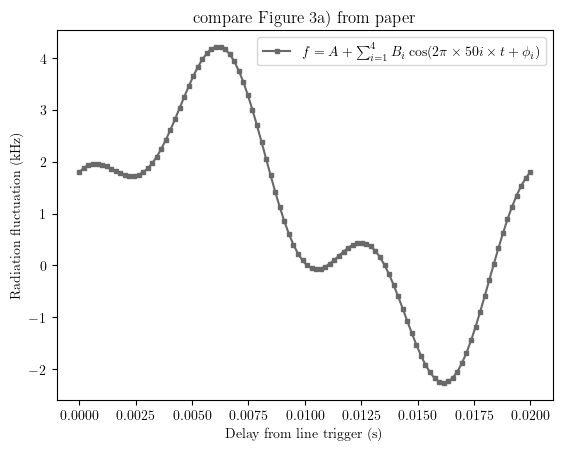

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def f(t, A, B, phi, shift):
    y = A

    for i in range(1, 5):
        print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
        y += B[i-1] * np.cos(2 * np.pi * 50 * i * (t-shift) + phi[i-1])

    return y

A = 1
B = [2.329, 0.067, 1.046, 0.038]
phi = np.array([0, -0*np.pi, -np.pi, 0])
phi = phi - 1
t = np.linspace(0, 0.02, 100)

f_values = f(t, A, B, phi, 0.002)

plot_with_one_axis(t, f_values, "Delay from line trigger (s)", "Radiation fluctuation (kHz)", plot_title="compare Figure 3a) from paper", filename_to_save="nopdf", label=r"$f = A + \sum_{i=1}^{4} B_i \cos(2\pi \times 50i \times t + \phi_i)$", colorr="dimgray", marker_type="s", marker_size="3")